In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pistachio-image-dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset_Request.txt
/kaggle/input/pistachio-image-dataset/Pistachio_Image_Dataset/Pistachio_16_Features_Dataset/Pistachio_16_Features_Dataset.arff
/kaggle/input/pistachio-image-dataset/Pistachio_Image_Dataset/Pistachio_16_Features_Dataset/Pistachio_16_Features_Dataset.xls
/kaggle/input/pistachio-image-dataset/Pistachio_Image_Dataset/Pistachio_16_Features_Dataset/Pistachio_16_Features_Dataset_Citation_Request.txt
/kaggle/input/pistachio-image-dataset/Pistachio_Image_Dataset/Pistachio_16_Features_Dataset/Pistachio_16_Features_Dataset.xlsx
/kaggle/input/pistachio-image-dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset_Request.txt
/kaggle/input/pistachio-image-dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio/kirmizi 1109.jpg
/kaggle/input/pistachio-image-dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio/kirmizi (10).jpg
/kaggle/input/p

In [3]:
!sudo pip install opencv-python tensorflow tf2onnx

     |████████████████████████████████| 62.2 MB 20 kB/s  eta 0:00:01
     |████████████████████████████████| 479.6 MB 15 kB/s s eta 0:00:011    |█████████▋                      | 144.0 MB 49.6 MB/s eta 0:00:07     |████████████████████████▍       | 366.1 MB 92.9 MB/s eta 0:00:02
     |████████████████████████████████| 455 kB 68.1 MB/s eta 0:00:01
     |████████████████████████████████| 17.3 MB 1.2 kB/s  eta 0:00:01
     |████████████████████████████████| 83 kB 16 kB/s s eta 0:00:01
     |████████████████████████████████| 57 kB 3.6 MB/s  eta 0:00:01
     |████████████████████████████████| 440 kB 47.4 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 3.2 MB/s  eta 0:00:01
     |████████████████████████████████| 53 kB 1.8 MB/s  eta 0:00:01
     |████████████████████████████████| 294 kB 63.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 60.7 MB/s eta 0:00:01
     |████████████████████████████████| 2.4 MB 38.6 MB/s eta 0:00:01
     |███████████████████████████

In [1]:
# example of pixel normalization
from numpy import asarray
from PIL import Image
# load image
image = Image.open('/kaggle/input/pistachio-image-dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio/kirmizi (1).jpg')
pixels = asarray(image)
# confirm pixel range is 0-255
print('Data Type: %s' % pixels.dtype)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
# convert from integers to floats
pixels = pixels.astype('float32')
# normalize to the range 0-1
pixels /= 255.0
# confirm the normalization
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Data Type: uint8
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000


Convolutional Neural Network

In [2]:
# cnn with single convolutional, pooling and output layer
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
# create model
model = Sequential()
# add convolutional layer
model.add(Conv2D(32, (3,3), input_shape=(256, 256, 1)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary()

2024-04-04 00:56:41.324514: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-04 00:56:41.324674: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-04 00:56:41.456033: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 516128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │       516,129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 516,449 (1.97 MB)

 Trainable params: 516,449 (1.97 MB)

 Non-trainable params: 0 (0.00 B)

Image Classification

In [3]:
# example of using a pre-trained model as a classifier
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
# load an image from file
image = load_img('/kaggle/input/pistachio-image-dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio/kirmizi (10).jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# load the model
model = VGG16()
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 132s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
daisy (8.08%)


I0000 00:00:1712192364.825106      86 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Train Image Classification Model

In [4]:
# fit a cnn on the fashion mnist dataset
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
# load dataset
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
# convert from integers to floats
trainX, testX = trainX.astype('float32'), testX.astype('float32')
# normalize to range 0-1
trainX,testX  = trainX / 255.0, testX / 255.0
# one hot encode target values
trainY, testY = to_categorical(trainY), to_categorical(testY)
# define model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# fit model
model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=2)
# evaluate model
loss, acc = model.evaluate(testX, testY, verbose=0)
print(loss, acc)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 326s 12us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


W0000 00:00:1712192707.083258      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1875/1875 - 6s - 3ms/step - accuracy: 0.8676 - loss: 0.3681
Epoch 2/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9100 - loss: 0.2481
Epoch 3/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9246 - loss: 0.2035
Epoch 4/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9369 - loss: 0.1702
Epoch 5/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9456 - loss: 0.1462
Epoch 6/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9552 - loss: 0.1224
Epoch 7/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9618 - loss: 0.1026
Epoch 8/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9677 - loss: 0.0886
Epoch 9/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9723 - loss: 0.0749
Epoch 10/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9768 - loss: 0.0632


W0000 00:00:1712192745.036271      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


0.38678452372550964 0.9049000144004822


Image Augmentation

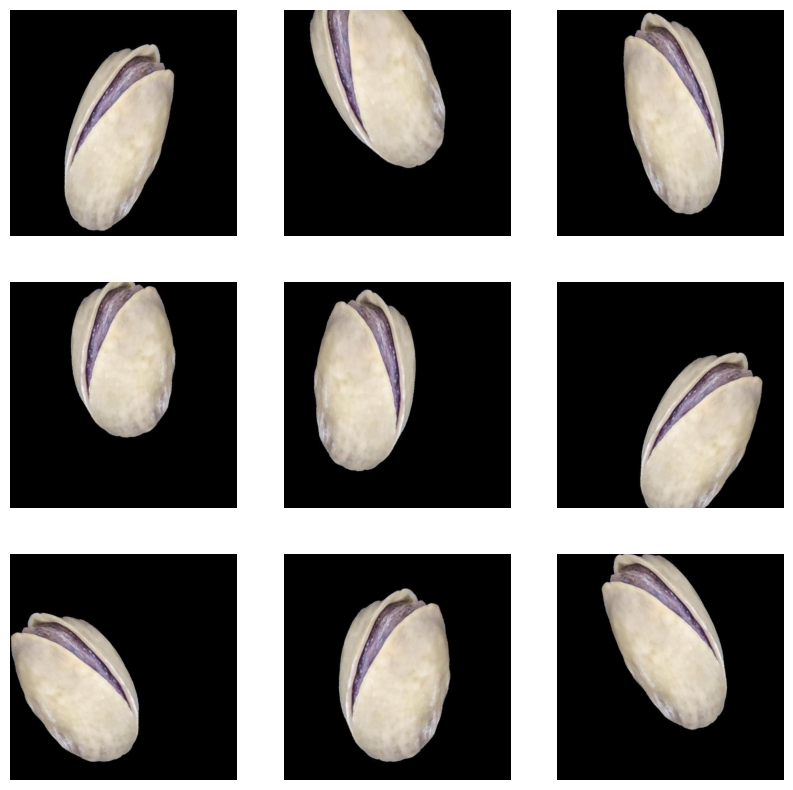

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Load an image
img = load_img('/kaggle/input/pistachio-image-dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio/kirmizi (15).jpg')
data = img_to_array(img)
samples = np.expand_dims(data, 0)

# Create an ImageDataGenerator and specify augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=40,      
    width_shift_range=0.2,  
    height_shift_range=0.2, 
    shear_range=0.2,        
    zoom_range=0.2,         
    horizontal_flip=True,  
    fill_mode='nearest'    
)

# Generate augmented samples and plot
plt.figure(figsize=(10, 10))
for i, batch in enumerate(datagen.flow(samples, batch_size=1)):
    if i == 9:  # Generate and plot 9 augmented images
        break
    augmented_image = batch[0].astype('uint8')
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image)
    plt.axis('off')
plt.show()


Face Detection

In [19]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 1.3 MB/s eta 0:00:0000:0100:010m


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 910ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 762ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step


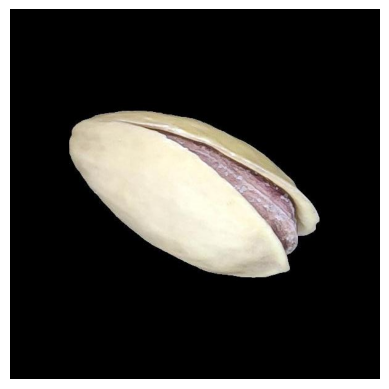

In [20]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn import MTCNN
import cv2

# Load image from file
image_path = '/kaggle/input/pistachio-image-dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio/kirmizi (13).jpg'
pixels = cv2.imread(image_path)

# Initialize the MTCNN detector
detector = MTCNN()

# Detect faces in the image
faces = detector.detect_faces(pixels)

# Plot the image
pyplot.imshow(cv2.cvtColor(pixels, cv2.COLOR_BGR2RGB))
ax = pyplot.gca()

# Plot each face as a rectangle
for face in faces:
    x, y, width, height = face['box']
    rect = Rectangle((x, y), width, height, fill=False, color='red')
    ax.add_patch(rect)

# Show the plot
pyplot.axis('off')
pyplot.show()

Using Haar Cascade for Object Detection

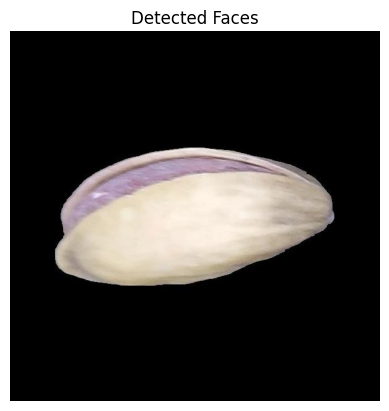

In [16]:
import cv2
import matplotlib.pyplot as plt

# Load the face cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load the image
image_path = "/kaggle/input/pistachio-image-dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio/kirmizi (14).jpg"
img = cv2.imread(image_path)

# Convert the image to grayscale for face detection
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces in the grayscale image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around the detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Display the image with detected faces using Matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Detected Faces')
plt.axis('off')
plt.show()
